# Big Data Mart Sales Problem - Description

###### Problem Statement: The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

### Importing Libraries

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [4]:
#Loading Train Data
Train_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

#Loading Test Data
Test_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

In [5]:
Train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [7]:
Test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [8]:
Train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
Test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [10]:
Train_df.shape,Test_df.shape

((8523, 12), (5681, 11))

In [11]:
Train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Checking Null values

In [12]:
Train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
Test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Checking Null Values through Heatmap

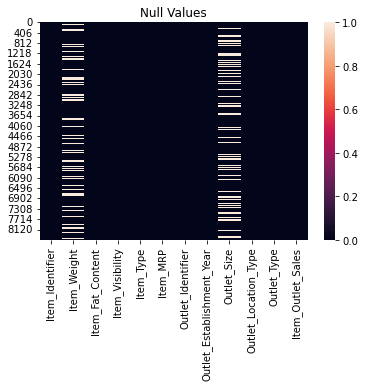

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(Train_df.isnull())
plt.title("Null Values")
plt.show()

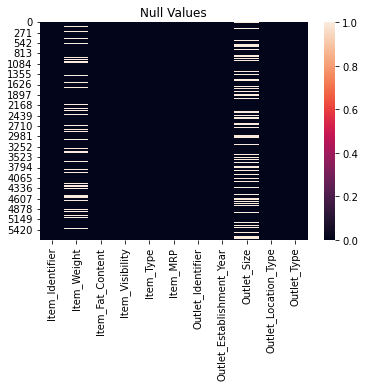

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(Test_df.isnull())
plt.title("Null Values")
plt.show()

Column Item_Weight & Outlet_Size contains Null values

In [17]:
#Using Mean Method For Train and Test Data Set

import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy="mean")

#Changing the Training Dataset

Train_df['Item_Weight']=imp.fit_transform(Train_df['Item_Weight'].values.reshape(-1,1))

#Changing the Testing Data Set

Test_df['Item_Weight']=imp.fit_transform(Test_df['Item_Weight'].values.reshape(-1,1))

In [19]:
#Using Mode Method for Categorical Columns Of Train and Test

Train_df['Outlet_Size']=Train_df['Outlet_Size'].fillna(Train_df['Outlet_Size'].mode()[0])

Test_df['Outlet_Size']=Test_df['Outlet_Size'].fillna(Test_df['Outlet_Size'].mode()[0])

### Rechecking Checking Null Values

In [20]:
Train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [22]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


various types of datatypes present in the datasets

In [23]:
Train_df.describe(include=['O'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,5203,3350,5577


In [24]:
Test_df.describe(include=['O'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,5681,5681,5681
unique,1543,5,16,10,3,3,4
top,DRF48,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,3468,2233,3717


In [25]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Checking for the columns details

In [26]:
cat_cols=Train_df.select_dtypes([object])

for col in cat_cols.columns:
    print(col)
    print(Train_df[col].value_counts())
    print('------------------------------------------------------------')

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
------------------------------------------------------------
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
--------------------------

In [27]:
# Combining same categories 

# Train Data Set

Train_df.Item_Fat_Content=Train_df.Item_Fat_Content.replace('LF','Low Fat')
Train_df.Item_Fat_Content=Train_df.Item_Fat_Content.replace('reg','Regular')
Train_df.Item_Fat_Content=Train_df.Item_Fat_Content.replace('low fat','Low Fat')

# Test Data Set

Test_df.Item_Fat_Content=Test_df.Item_Fat_Content.replace('LF','Low Fat')
Test_df.Item_Fat_Content=Test_df.Item_Fat_Content.replace('reg','Regular')
Test_df.Item_Fat_Content=Test_df.Item_Fat_Content.replace('low fat','Low Fat')

Retrieving the Data

In [28]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

list1=['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier','Item_Type','Item_Fat_Content','Item_Identifier']
for val in list1:
  Train_df[val]=le.fit_transform(Train_df[val].astype(str))
  Test_df[val]=le.fit_transform(Test_df[val].astype(str))

In [29]:
Train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


### EDA

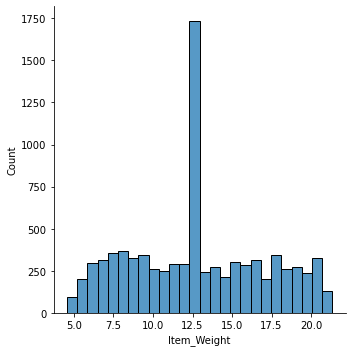

In [31]:
sns.displot(Train_df['Item_Weight'])

max item wieght range between the Range 0 to 300

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

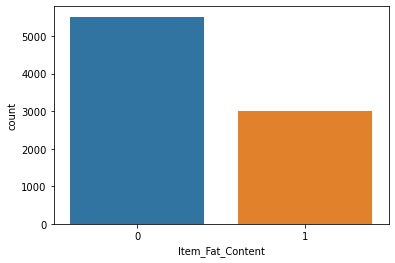

In [32]:
sns.countplot(Train_df['Item_Fat_Content'])

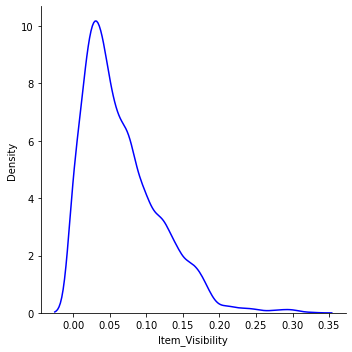

In [33]:
sns.displot(Train_df['Item_Visibility'],kind='kde',color='blue')

In [34]:
Train_df['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

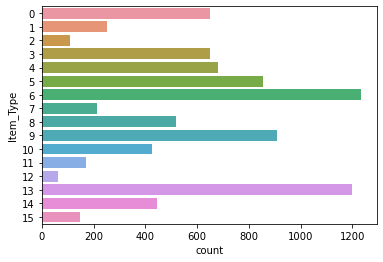

In [35]:
sns.countplot(y=Train_df['Item_Type'])

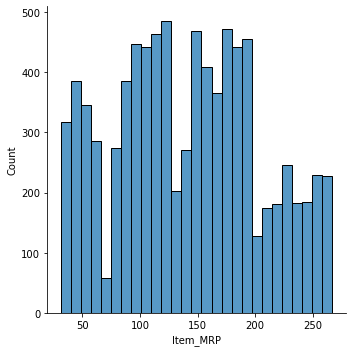

In [36]:
sns.displot(Train_df['Item_MRP'],kind='hist')

the graph is plotted regular

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

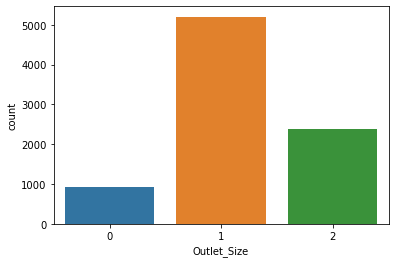

In [38]:
sns.countplot(Train_df['Outlet_Size'])

The plot shows that outlet with meduim size is higher compared to large ones and followed by small ones

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

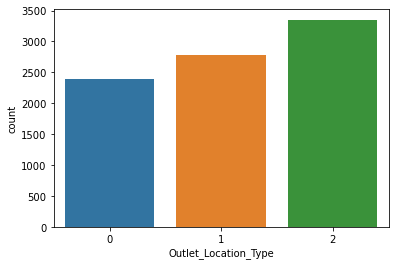

In [39]:
sns.countplot(Train_df['Outlet_Location_Type'])

Outlet is equally distributed

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

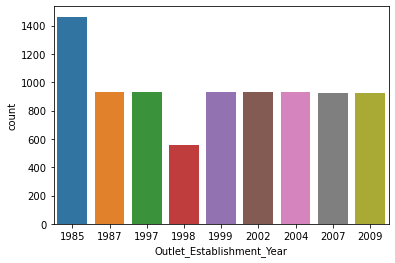

In [40]:
sns.countplot(Train_df['Outlet_Establishment_Year'])

equal numbers of outlet are opened every year

array([[<AxesSubplot:title={'center':'Item_Identifier'}>,
        <AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Fat_Content'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>,
        <AxesSubplot:title={'center':'Item_Type'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Identifier'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>,
        <AxesSubplot:title={'center':'Outlet_Size'}>,
        <AxesSubplot:title={'center':'Outlet_Location_Type'}>],
       [<AxesSubplot:title={'center':'Outlet_Type'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

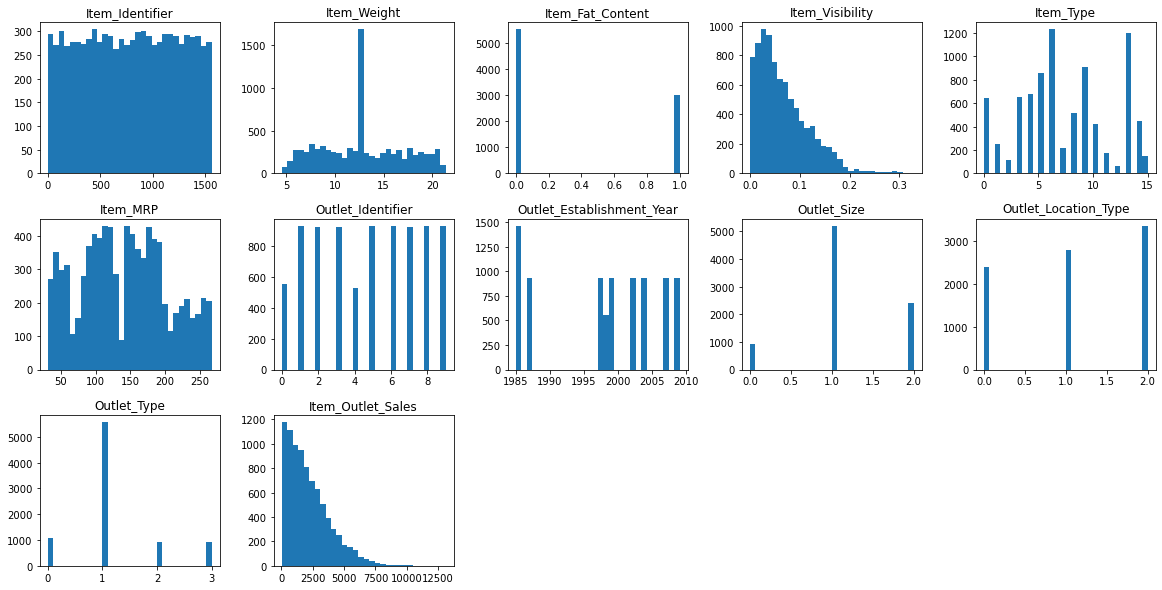

In [41]:
Train_df.hist(figsize=(20,10), grid=False, layout=(3,5), bins = 30)

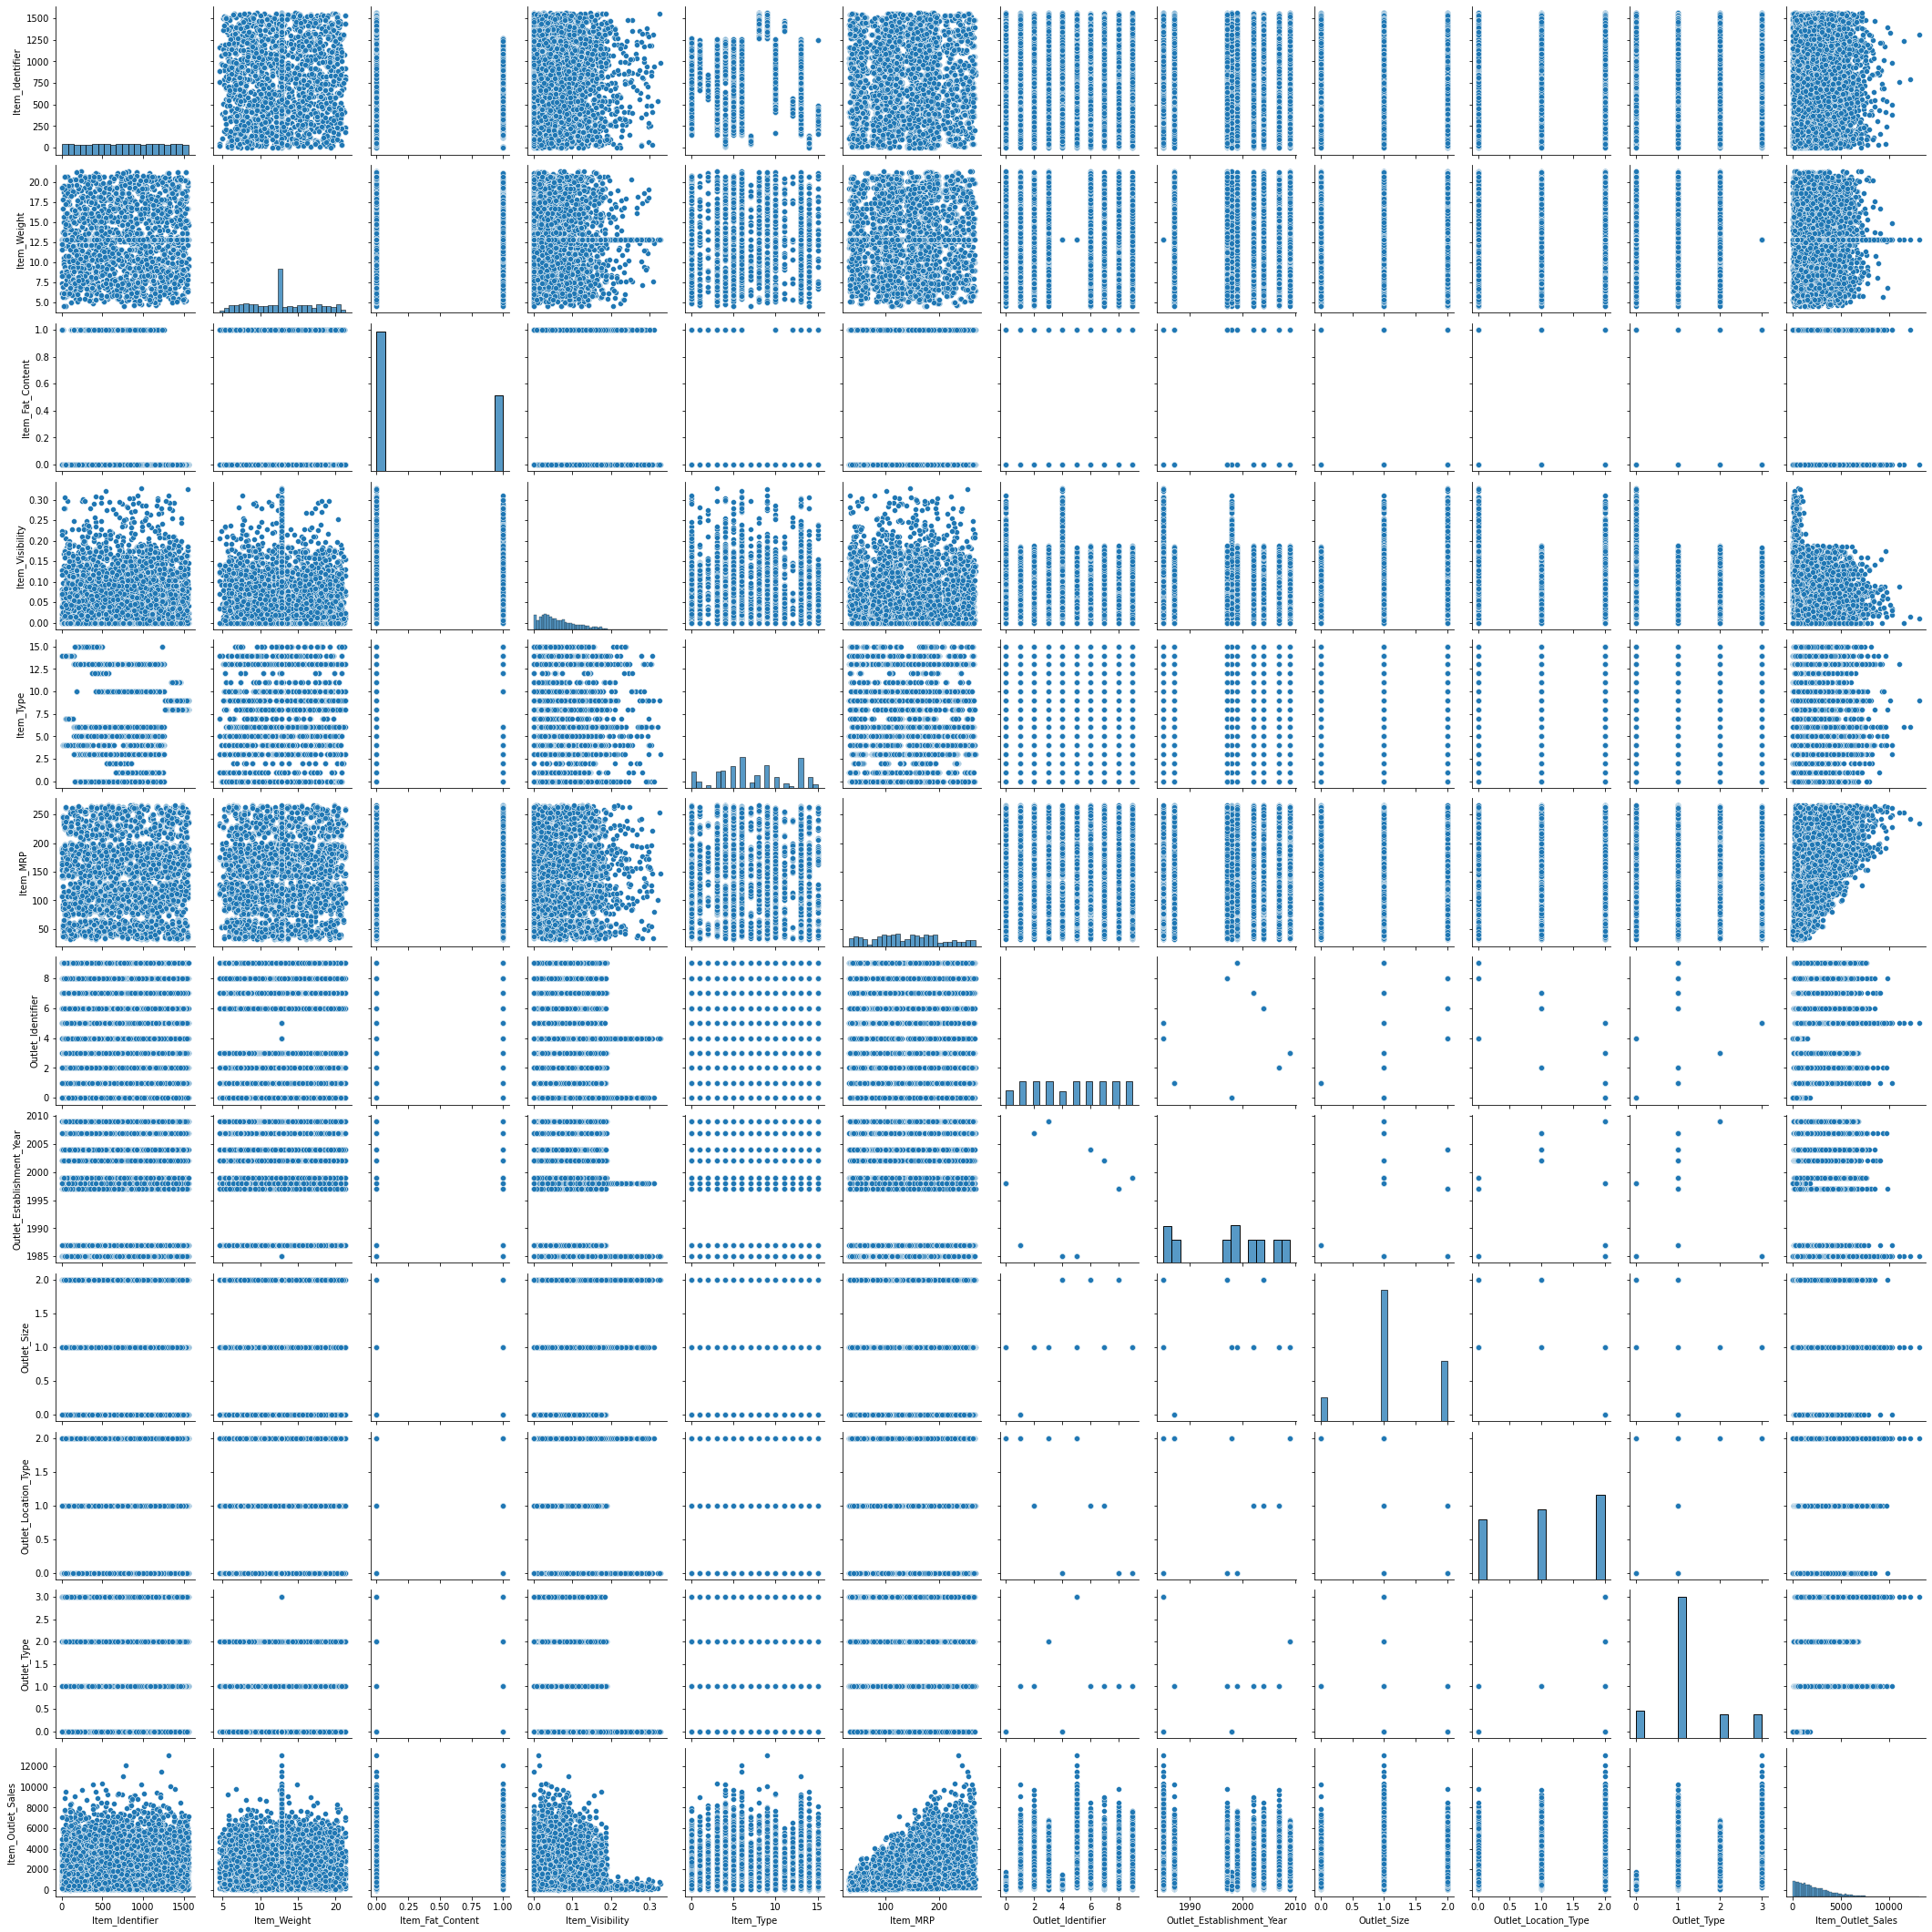

In [42]:
sns.pairplot(Train_df)

### Coorelartion

In [43]:
Train_df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


In [44]:
Train_df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Identifier              0.002869
Item_Weight                  0.011550
Item_Type                    0.017048
Item_Fat_Content             0.018719
Outlet_Location_Type         0.089367
Outlet_Identifier            0.162325
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

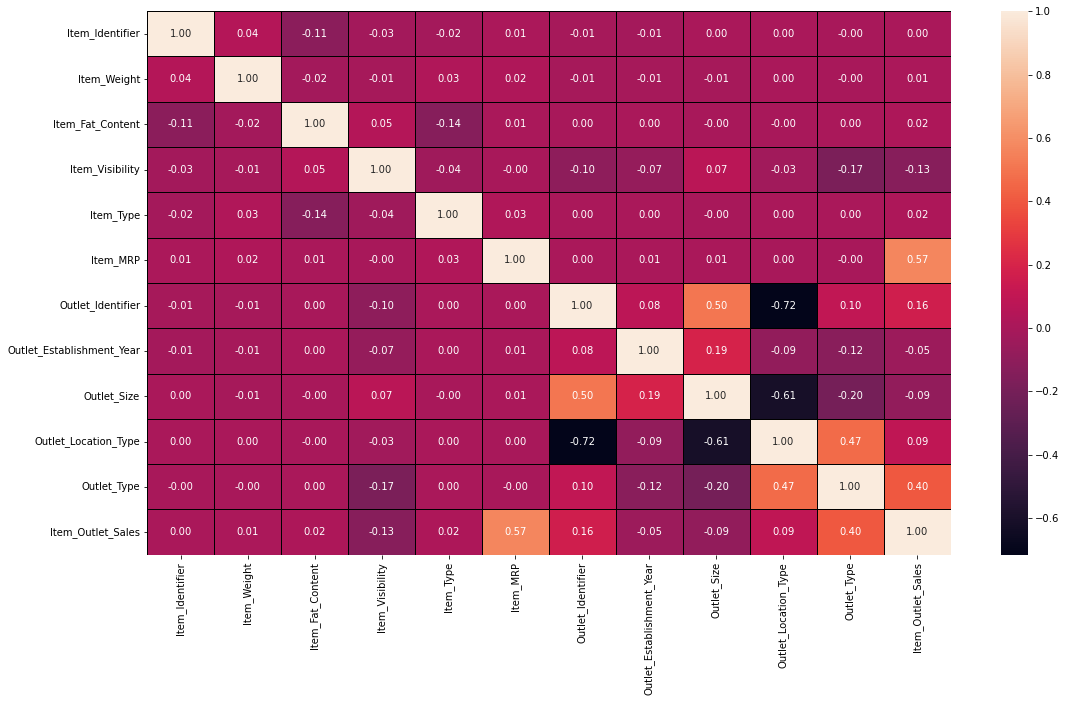

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(Train_df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

### droping Columns

In [47]:
Train_df.drop(['Item_Visibility','Item_Weight','Outlet_Identifier'],axis=1,inplace=True)

In [48]:
Train_df.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,0.352693,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,0.477836,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,0.000000,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,0.000000,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,1.000000,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,1.000000,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


<AxesSubplot:>

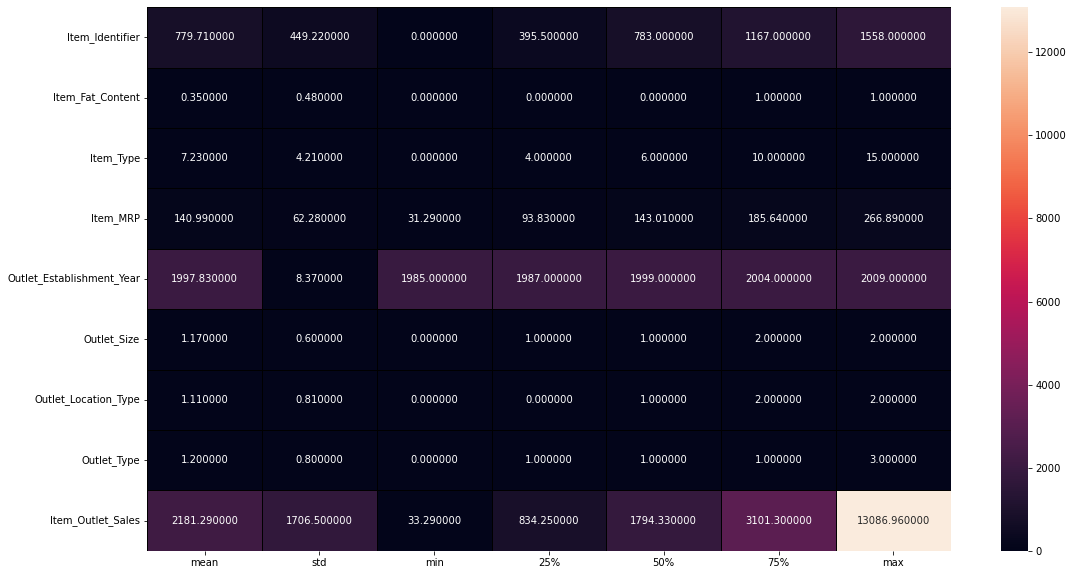

In [50]:
plt.figure(figsize=(18,10))
sns.heatmap(round(Train_df.describe()[1:].transpose(),2), annot=True, linewidths=0.5,linecolor="black", fmt='f')

In [51]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Type                  8523 non-null   int32  
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int32  
 6   Outlet_Location_Type       8523 non-null   int32  
 7   Outlet_Type                8523 non-null   int32  
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(2), int32(6), int64(1)
memory usage: 399.6 KB


### Checking Skewness

In [52]:
Train_df.iloc[:,:-1]

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,0,4,249.8092,1999,1,0,1
1,8,1,14,48.2692,2009,1,2,2
2,662,0,10,141.6180,1999,1,0,1
3,1121,1,6,182.0950,1998,1,2,0
4,1297,0,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...
8518,370,0,13,214.5218,1987,0,2,1
8519,897,1,0,108.1570,2002,1,1,1
8520,1357,0,8,85.1224,2004,2,1,1
8521,681,1,13,103.1332,2009,1,2,2


In [53]:
Train_df.iloc[:,:-1].skew()

Item_Identifier             -0.008877
Item_Fat_Content             0.616705
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
dtype: float64

Removing Skewness

In [54]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Train_df.iloc[:,:-1],method='yeo-johnson')

Train_df.iloc[:,:-1]=pd.DataFrame(x_new,columns=Train_df.iloc[:,:-1].columns)

In [55]:
Train_df.iloc[:,:-1].skew()

Item_Identifier             -0.293700
Item_Fat_Content             0.616705
Item_Type                   -0.164574
Item_MRP                    -0.115386
Outlet_Establishment_Year   -0.200959
Outlet_Size                 -0.042980
Outlet_Location_Type        -0.220632
Outlet_Type                  0.007863
dtype: float64

### Checking Outliers

Item_Identifier                 AxesSubplot(0.125,0.657941;0.133621x0.222059)
Item_Fat_Content             AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Item_Type                     AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Item_MRP                     AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Outlet_Establishment_Year    AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Outlet_Size                     AxesSubplot(0.125,0.391471;0.133621x0.222059)
Outlet_Location_Type         AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Outlet_Type                   AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Item_Outlet_Sales            AxesSubplot(0.606034,0.391471;0.133621x0.222059)
dtype: object

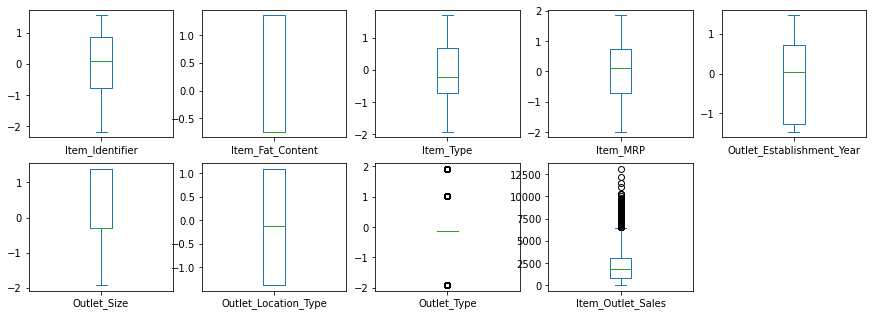

In [57]:
import warnings
warnings.filterwarnings('ignore')
Train_df.plot(kind='box',subplots=True, layout=(3,5), figsize=[15,8])

### Z - Score Technique

In [58]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(Train_df))
z.shape

(8523, 9)

In [59]:
threshold=3
print(np.where(z>3))

(array([ 130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
        809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
       2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
       3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
       4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
       5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
       6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
       7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
       8245, 8447], dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8], dtype=int64))


In [60]:
len(np.where(z>3)[0])

90

In [61]:
Train_df.drop([130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
        809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
       2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
       3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
       4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
       5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
       6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
       7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
       8245, 8447],axis=0)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.461039,-0.738147,-0.712347,1.623670,0.048562,-0.293295,-1.373843,-0.123488,3735.1380
1,-2.093858,1.354743,1.504660,-1.595016,1.461925,-0.293295,1.088324,1.040591,443.4228
2,-0.154018,-0.738147,0.684390,0.081237,0.048562,-0.293295,-1.373843,-0.123488,2097.2700
3,0.773522,1.354743,-0.215420,0.689968,-0.075796,-0.293295,1.088324,-1.915952,732.3800
4,1.098294,-0.738147,0.468410,-1.476078,-1.270835,-1.925925,1.088324,-0.123488,994.7052
...,...,...,...,...,...,...,...,...,...
8518,-0.844393,-0.738147,1.305304,1.148258,-1.270835,-1.925925,1.088324,-0.123488,2778.3834
8519,0.338073,1.354743,-1.923750,-0.463127,0.439191,-0.293295,-0.131113,-0.123488,549.2850
8520,1.206073,-0.738147,0.246996,-0.867930,0.714912,1.390694,-0.131113,-0.123488,1193.1136
8521,-0.112559,1.354743,1.305304,-0.548996,1.461925,-0.293295,1.088324,1.040591,1845.5976


In [62]:
Train_df=Train_df[(z<3).all(axis=1)]

In [63]:
Train_df.shape

(8433, 9)

In [64]:
##Variantion Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
Train_df.corr()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,-0.079993,-0.032958,0.017657,-0.011585,0.000439,0.003751,-0.005244,0.007337
Item_Fat_Content,-0.079993,1.000000,-0.144189,0.006465,0.003495,-0.000898,-0.002206,0.002262,0.020195
Item_Type,-0.032958,-0.144189,1.000000,0.038513,0.005571,-0.001996,0.002638,0.002423,0.018842
Item_MRP,0.017657,0.006465,0.038513,1.000000,0.015850,0.009649,-0.008098,-0.016624,0.564049
Outlet_Establishment_Year,-0.011585,0.003495,0.005571,0.015850,1.000000,0.167464,-0.032301,0.049828,-0.007602
Outlet_Size,0.000439,-0.000898,-0.001996,0.009649,0.167464,1.000000,-0.614542,-0.222732,-0.084767
Outlet_Location_Type,0.003751,-0.002206,0.002638,-0.008098,-0.032301,-0.614542,1.000000,0.400313,0.069566
Outlet_Type,-0.005244,0.002262,0.002423,-0.016624,0.049828,-0.222732,0.400313,1.000000,0.418901
Item_Outlet_Sales,0.007337,0.020195,0.018842,0.564049,-0.007602,-0.084767,0.069566,0.418901,1.000000


<AxesSubplot:>

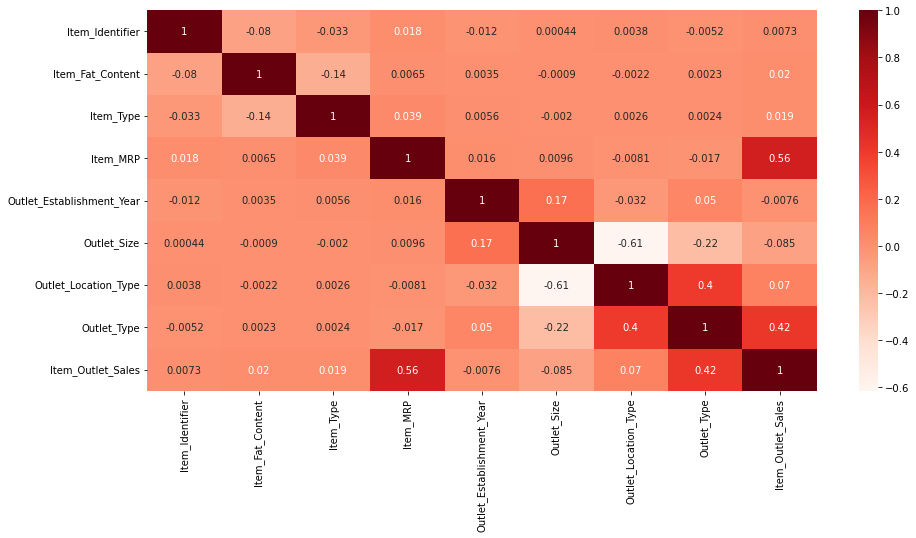

In [69]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(Train_df.corr(),cmap="Reds",annot=True)

In [70]:
# indpendent Column
x=Train_df.iloc[:,:-1]
#target
y=Train_df.iloc[:,-1]

In [71]:
x

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-1.461039,-0.738147,-0.712347,1.623670,0.048562,-0.293295,-1.373843,-0.123488
1,-2.093858,1.354743,1.504660,-1.595016,1.461925,-0.293295,1.088324,1.040591
2,-0.154018,-0.738147,0.684390,0.081237,0.048562,-0.293295,-1.373843,-0.123488
3,0.773522,1.354743,-0.215420,0.689968,-0.075796,-0.293295,1.088324,-1.915952
4,1.098294,-0.738147,0.468410,-1.476078,-1.270835,-1.925925,1.088324,-0.123488
...,...,...,...,...,...,...,...,...
8518,-0.844393,-0.738147,1.305304,1.148258,-1.270835,-1.925925,1.088324,-0.123488
8519,0.338073,1.354743,-1.923750,-0.463127,0.439191,-0.293295,-0.131113,-0.123488
8520,1.206073,-0.738147,0.246996,-0.867930,0.714912,1.390694,-0.131113,-0.123488
8521,-0.112559,1.354743,1.305304,-0.548996,1.461925,-0.293295,1.088324,1.040591


In [72]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8433, dtype: float64

In [73]:
def vif_calc():
  vif=pd.DataFrame()
  vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  vif["features"]=x.columns
  print(vif)

In [74]:
vif_calc()

   VIF Factor                   features
0    1.009107            Item_Identifier
1    1.029016           Item_Fat_Content
2    1.025058                  Item_Type
3    1.002595                   Item_MRP
4    1.042043  Outlet_Establishment_Year
5    1.665940                Outlet_Size
6    1.828113       Outlet_Location_Type
7    1.197308                Outlet_Type


### Data Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.46041045, -0.73809784, -0.71149757, ..., -0.29476771,
        -1.36724661, -0.1111303 ],
       [-2.09271523,  1.35483393,  1.50458802, ..., -0.29476771,
         1.09532557,  1.06229529],
       [-0.15445344, -0.73809784,  0.68465936, ..., -0.29476771,
        -1.36724661, -0.1111303 ],
       ...,
       [ 1.2045313 , -0.73809784,  0.24744661, ...,  1.38450217,
        -0.1243127 , -0.1111303 ],
       [-0.11302774,  1.35483393,  1.30531546, ..., -0.29476771,
         1.09532557,  1.06229529],
       [-1.86150182, -0.73809784,  1.50458802, ...,  1.38450217,
        -1.36724661, -0.1111303 ]])

### Using Linear regression Model

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score


for i in range(1,100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  pred_train=lr.predict(x_train)
  pred_test=lr.predict(x_test)
  print(f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)*100}")
  print(f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)*100}")
  print("\n")

At random state 1,the training accuracy is :- 51.983516628264304
At random state 1,the testing accuracy is :- 51.61091704884873


At random state 2,the training accuracy is :- 52.3341977250119
At random state 2,the testing accuracy is :- 49.918541467928755


At random state 3,the training accuracy is :- 52.21365911965962
At random state 3,the testing accuracy is :- 50.628685766715755


At random state 4,the training accuracy is :- 51.54633314054544
At random state 4,the testing accuracy is :- 53.40147455466223


At random state 5,the training accuracy is :- 53.04073378505905
At random state 5,the testing accuracy is :- 47.06040246580693


At random state 6,the training accuracy is :- 51.83683295181406
At random state 6,the testing accuracy is :- 52.0391948582959


At random state 7,the training accuracy is :- 51.628954548709025
At random state 7,the testing accuracy is :- 52.91602027594886


At random state 8,the training accuracy is :- 51.68903716587088
At random state 8,the testing a

At random state 80,the training accuracy is :- 52.439489723908906
At random state 80,the testing accuracy is :- 49.84116118384073


At random state 81,the training accuracy is :- 51.93961954978121
At random state 81,the testing accuracy is :- 51.74207408476301


At random state 82,the training accuracy is :- 51.715367877465454
At random state 82,the testing accuracy is :- 52.624953142276595


At random state 83,the training accuracy is :- 52.31155669557195
At random state 83,the testing accuracy is :- 50.137285474422775


At random state 84,the training accuracy is :- 52.4649267800928
At random state 84,the testing accuracy is :- 49.53817602886696


At random state 85,the training accuracy is :- 51.3781632305003
At random state 85,the testing accuracy is :- 53.94259702288362


At random state 86,the training accuracy is :- 51.380358687880445
At random state 86,the testing accuracy is :- 53.9669963869724


At random state 87,the training accuracy is :- 51.93618383968681
At random state 

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=44)

Linear Regression

In [79]:
pred=lr.predict(x_test)
print("predicted result ",pred)
print('actual result',y_test)

predicted result  [2124.4281037   718.17812306 1974.6282716  ... -861.12407933 3455.58937405
 3423.38827275]
actual result 1919    1482.0708
6698     999.3658
7654    1717.7640
302     5895.6590
5858    1369.5506
          ...    
7564     802.9548
2477    4042.7376
3216     117.1808
7163    4781.7756
3917    4613.9940
Name: Item_Outlet_Sales, Length: 1687, dtype: float64


In [81]:
print('Error:')
print('Mean_Absolute_Error :',mean_absolute_error(y_test,pred))
print('Mean_Squared_Error :',mean_squared_error(y_test,pred))
print('Root_Mean_Squared_Error',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred)*100)

Error:
Mean_Absolute_Error : 816.9192532985496
Mean_Squared_Error : 1149778.191076429
Root_Mean_Squared_Error 1072.2771055452174
r2 score : 52.96930835996141


### Decission Tree Regression

In [82]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [83]:
pred=dtr.predict(x_test)
print("predicted result ",pred)
print('actual result',y_test)

predicted result  [1000.6974 1090.5804 2648.5524 ...  165.7842 4527.44   4111.9808]
actual result 1919    1482.0708
6698     999.3658
7654    1717.7640
302     5895.6590
5858    1369.5506
          ...    
7564     802.9548
2477    4042.7376
3216     117.1808
7163    4781.7756
3917    4613.9940
Name: Item_Outlet_Sales, Length: 1687, dtype: float64


In [84]:
print('Error:')
print('Mean_Absolute_Error :',mean_absolute_error(y_test,pred))
print('Mean_Squared_Error :',mean_squared_error(y_test,pred))
print('Root_Mean_Squared_Error',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred)*100)

Error:
Mean_Absolute_Error : 1020.8075594546532
Mean_Squared_Error : 2115430.3861717554
Root_Mean_Squared_Error 1454.4519195118673
r2 score : 13.470132804599189


### Regularization

In [85]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [86]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

51.65680148131173

### Ensemble Technique

In [87]:
from sklearn.ensemble import RandomForestRegressor
Rrf=RandomForestRegressor()

parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
clf = GridSearchCV(Rrf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [88]:
from sklearn.model_selection import cross_val_score

Rrf= RandomForestRegressor(criterion="mae",max_features="log2")
Rrf.fit(x_train,y_train)
Rrf.score(x_train,y_train)
pred_decession = Rrf.predict(x_test)

rfs = r2_score(y_test,pred_decession)
print('R2_Score :',rfs*100)

rfscore = cross_val_score(Rrf,x,y,cv=5)
rfc=rfscore.mean()
print('cross_Val_Score :',rfc*100)

R2_Score : 56.90157713695814
cross_Val_Score : 55.28485048432523


# Saving Model

In [90]:
import pickle
filename = 'Big Data Mart Sales Problem.pkl'
pickle.dump(Rrf,open(filename,'wb'))

# Thanks